<a href="https://colab.research.google.com/github/drscicomm/food-security/blob/main/Food_Security_Survey_Text_Mining_20220616.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Frequency in 'Machine Leaning for Food Assistance' Scoping Review
Preprocessing source code: https://towardsdatascience.com/nlp-preprocessing-with-nltk-3c04ee00edc0

# Mount Google Drive and Import File

# Preprocess text file for Natural Language Processing </br>


*   Convert to lowercase
*   Remove numbers

*   Remove punctuation
*   Tokenization


*   Filter stop words
*   Stemming


*   Part of Speech (POS) Tagger









In [ ]:
# Import NLP preprocessing dependencies
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# load data
filename = '/content/Q13 3 to 5 challenges.csv'
file = open(filename, 'rt')
text = file.read()
file.close()

In [ ]:
# split into words
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)

In [ ]:
# convert to lower case
tokens = [w.lower() for w in tokens]

In [ ]:
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]

In [ ]:
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]

In [ ]:
# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english') + ['given'] + ['also']+ ['na'] + ['yes'] + ['log'] + ['lev'] + ['wwwplosoneorg'] + ['used'] + ['plosone'] + ['using'] + ['et'] + ['1b'] + ['iii'] + ['plos'] + ['al'] + ['gi'] + ['j'] + ['ic'] + ['ur'] + ['sd'] + ['ar'] + ['fs'] + ['gi'] + ['f'] + ['b'] + ['es'])
words = [w for w in words if not w in stop_words] 
print(words[:50])

['enough', 'money', 'purchase', 'food', 'nt', 'enough', 'donated', 'food', 'available', 'lack', 'funding', 'competition', 'funding', 'lack', 'respects', 'agenda', 'organization', 'donors', 'supply', 'chain', 'issues', 'increased', 'cost', 'food', 'increase', 'participation', 'food', 'programs', 'funding', 'staffing', 'food', 'access', 'staff', 'volunteers', 'truck', 'get', 'funding', 'food', 'insecurity', 'statistics', 'fully', 'capture', 'scope', 'scale', 'many', 'ways', 'marylanders', 'experience', 'food', 'hardship']


# Calculate Word Frequency Distribution

In [ ]:
# calculate word frequency distribution
from nltk.probability import FreqDist
data_analysis = nltk.FreqDist(words)

access: 3
accurate: 1
agencies: 3
agenda: 1
another: 1
availability: 3
available: 3
bank: 1
budget: 1
budgetfinancial: 1
capacity: 1
capture: 1
carryout: 1
census: 1
chain: 4
challenge: 1
challenging: 2
clear: 1
clients: 1
collecting: 1
collection: 1
competition: 1
consistent: 1
constraints: 1
cost: 1
costs: 1
create: 1
data: 7
defining: 1
demand: 1
deserts: 1
different: 1
distribute: 1
distribution: 1
donated: 1
donors: 1
enough: 2
erratic: 1
expense: 1
experience: 1
facility: 1
federal: 1
finding: 1
fiscal: 1
food: 22
fully: 1
funding: 8
funds: 1
generally: 1
getting: 1
government: 1
governmental: 2
hardship: 1
high: 1
higher: 1
household: 1
human: 1
impression: 1
incomes: 1
increase: 2
increased: 1
insecure: 1
insecurity: 3
insufficiency: 1
internet: 1
intervention: 1
issues: 1
lack: 4
lags: 1
limitation: 1
limited: 1
local: 1
localized: 1
location: 1
makes: 1
many: 1
maryland: 1
marylanders: 1
meet: 1
member: 1
metric: 1
might: 1
mission: 1
money: 1
monitor: 1
monitoring: 1
narrowl

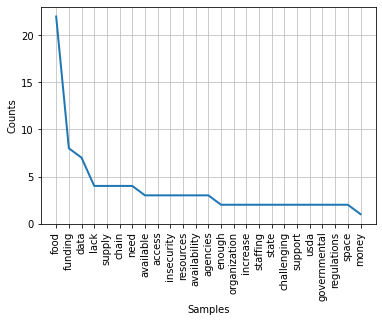

In [ ]:
# Let's take the specific words only if their frequency is greater than 3.
filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 3])
 
for key in sorted(filter_words):
    print("%s: %s" % (key, filter_words[key]))
 
data_analysis = nltk.FreqDist(filter_words)
 
data_analysis.plot(25, cumulative=False)

In [ ]:
data_analysis.most_common(50)

[('food', 22),
 ('funding', 8),
 ('data', 7),
 ('lack', 4),
 ('supply', 4),
 ('chain', 4),
 ('need', 4),
 ('available', 3),
 ('access', 3),
 ('insecurity', 3),
 ('resources', 3),
 ('availability', 3),
 ('agencies', 3),
 ('enough', 2),
 ('organization', 2),
 ('increase', 2),
 ('staffing', 2),
 ('state', 2),
 ('challenging', 2),
 ('support', 2),
 ('usda', 2),
 ('governmental', 2),
 ('regulations', 2),
 ('space', 2),
 ('money', 1),
 ('purchase', 1),
 ('donated', 1),
 ('competition', 1),
 ('respects', 1),
 ('agenda', 1),
 ('donors', 1),
 ('issues', 1),
 ('increased', 1),
 ('cost', 1),
 ('participation', 1),
 ('programs', 1),
 ('staff', 1),
 ('volunteers', 1),
 ('truck', 1),
 ('statistics', 1),
 ('fully', 1),
 ('capture', 1),
 ('scope', 1),
 ('scale', 1),
 ('many', 1),
 ('ways', 1),
 ('marylanders', 1),
 ('experience', 1),
 ('hardship', 1),
 ('underreporting', 1)]

In [ ]:
import pandas as pd

In [ ]:
df_common = pd.DataFrame(data_analysis.most_common(50),
                    columns=['Word', 'Frequency'])
print(df_common)

              Word  Frequency
0             food         22
1          funding          8
2             data          7
3             lack          4
4           supply          4
5            chain          4
6             need          4
7        available          3
8           access          3
9       insecurity          3
10       resources          3
11    availability          3
12        agencies          3
13          enough          2
14    organization          2
15        increase          2
16        staffing          2
17           state          2
18     challenging          2
19         support          2
20            usda          2
21    governmental          2
22     regulations          2
23           space          2
24           money          1
25        purchase          1
26         donated          1
27     competition          1
28        respects          1
29          agenda          1
30          donors          1
31          issues          1
32       i

In [ ]:
# convert pandas dataframe to CSV file
df_common.to_csv('most_common.csv')

# Frequency of word pairs (bigrams)

In [ ]:
#Create bigrams
bgs = nltk.bigrams(words)

#compute frequency distribution for all the bigrams in the text
fdist = nltk.FreqDist(bgs)
for k,v in fdist.items():
    print (k,v)

('enough', 'money') 1
('money', 'purchase') 1
('purchase', 'food') 1
('food', 'nt') 1
('nt', 'enough') 1
('enough', 'donated') 1
('donated', 'food') 1
('food', 'available') 1
('available', 'lack') 1
('lack', 'funding') 1
('funding', 'competition') 1
('competition', 'funding') 1
('funding', 'lack') 1
('lack', 'respects') 1
('respects', 'agenda') 1
('agenda', 'organization') 1
('organization', 'donors') 1
('donors', 'supply') 1
('supply', 'chain') 4
('chain', 'issues') 1
('issues', 'increased') 1
('increased', 'cost') 1
('cost', 'food') 1
('food', 'increase') 2
('increase', 'participation') 1
('participation', 'food') 1
('food', 'programs') 1
('programs', 'funding') 1
('funding', 'staffing') 1
('staffing', 'food') 1
('food', 'access') 2
('access', 'staff') 1
('staff', 'volunteers') 1
('volunteers', 'truck') 1
('truck', 'get') 1
('get', 'funding') 1
('funding', 'food') 1
('food', 'insecurity') 3
('insecurity', 'statistics') 1
('statistics', 'fully') 1
('fully', 'capture') 1
('capture', 's

In [ ]:
fdist.most_common(100)

[(('supply', 'chain'), 4),
 (('food', 'insecurity'), 3),
 (('food', 'increase'), 2),
 (('food', 'access'), 2),
 (('governmental', 'regulations'), 2),
 (('enough', 'money'), 1),
 (('money', 'purchase'), 1),
 (('purchase', 'food'), 1),
 (('food', 'nt'), 1),
 (('nt', 'enough'), 1),
 (('enough', 'donated'), 1),
 (('donated', 'food'), 1),
 (('food', 'available'), 1),
 (('available', 'lack'), 1),
 (('lack', 'funding'), 1),
 (('funding', 'competition'), 1),
 (('competition', 'funding'), 1),
 (('funding', 'lack'), 1),
 (('lack', 'respects'), 1),
 (('respects', 'agenda'), 1),
 (('agenda', 'organization'), 1),
 (('organization', 'donors'), 1),
 (('donors', 'supply'), 1),
 (('chain', 'issues'), 1),
 (('issues', 'increased'), 1),
 (('increased', 'cost'), 1),
 (('cost', 'food'), 1),
 (('increase', 'participation'), 1),
 (('participation', 'food'), 1),
 (('food', 'programs'), 1),
 (('programs', 'funding'), 1),
 (('funding', 'staffing'), 1),
 (('staffing', 'food'), 1),
 (('access', 'staff'), 1),
 (('

In [ ]:
df_bigrams = pd.DataFrame(fdist.most_common(2000),
                    columns=['Word', 'Frequency'])
print(df_bigrams)

                            Word  Frequency
0                (supply, chain)          4
1             (food, insecurity)          3
2               (food, increase)          2
3                 (food, access)          2
4    (governmental, regulations)          2
..                           ...        ...
208            (deserts, fiscal)          1
209         (fiscal, limitation)          1
210         (limitation, supply)          1
211             (chain, product)          1
212         (product, shortages)          1

[213 rows x 2 columns]


In [ ]:
# convert pandas dataframe to CSV file
df_bigrams.to_csv('bigrams.csv')

# Frequency of word pairs (trigrams)

In [ ]:
#Create trigrams
tgs = nltk.trigrams(words)

#compute frequency distribution for all the trigrams in the text
fdist2 = nltk.FreqDist(tgs)
for k,v in fdist2.items():
    print (k,v)

('enough', 'money', 'purchase') 1
('money', 'purchase', 'food') 1
('purchase', 'food', 'nt') 1
('food', 'nt', 'enough') 1
('nt', 'enough', 'donated') 1
('enough', 'donated', 'food') 1
('donated', 'food', 'available') 1
('food', 'available', 'lack') 1
('available', 'lack', 'funding') 1
('lack', 'funding', 'competition') 1
('funding', 'competition', 'funding') 1
('competition', 'funding', 'lack') 1
('funding', 'lack', 'respects') 1
('lack', 'respects', 'agenda') 1
('respects', 'agenda', 'organization') 1
('agenda', 'organization', 'donors') 1
('organization', 'donors', 'supply') 1
('donors', 'supply', 'chain') 1
('supply', 'chain', 'issues') 1
('chain', 'issues', 'increased') 1
('issues', 'increased', 'cost') 1
('increased', 'cost', 'food') 1
('cost', 'food', 'increase') 1
('food', 'increase', 'participation') 1
('increase', 'participation', 'food') 1
('participation', 'food', 'programs') 1
('food', 'programs', 'funding') 1
('programs', 'funding', 'staffing') 1
('funding', 'staffing', 'f

In [ ]:
fdist2.most_common(100)

[(('enough', 'money', 'purchase'), 1),
 (('money', 'purchase', 'food'), 1),
 (('purchase', 'food', 'nt'), 1),
 (('food', 'nt', 'enough'), 1),
 (('nt', 'enough', 'donated'), 1),
 (('enough', 'donated', 'food'), 1),
 (('donated', 'food', 'available'), 1),
 (('food', 'available', 'lack'), 1),
 (('available', 'lack', 'funding'), 1),
 (('lack', 'funding', 'competition'), 1),
 (('funding', 'competition', 'funding'), 1),
 (('competition', 'funding', 'lack'), 1),
 (('funding', 'lack', 'respects'), 1),
 (('lack', 'respects', 'agenda'), 1),
 (('respects', 'agenda', 'organization'), 1),
 (('agenda', 'organization', 'donors'), 1),
 (('organization', 'donors', 'supply'), 1),
 (('donors', 'supply', 'chain'), 1),
 (('supply', 'chain', 'issues'), 1),
 (('chain', 'issues', 'increased'), 1),
 (('issues', 'increased', 'cost'), 1),
 (('increased', 'cost', 'food'), 1),
 (('cost', 'food', 'increase'), 1),
 (('food', 'increase', 'participation'), 1),
 (('increase', 'participation', 'food'), 1),
 (('participa

In [ ]:
df_trigrams = pd.DataFrame(fdist2.most_common(2000),
                    columns=['Word', 'Frequency'])
print(df_trigrams)

                              Word  Frequency
0        (enough, money, purchase)          1
1          (money, purchase, food)          1
2             (purchase, food, nt)          1
3               (food, nt, enough)          1
4            (nt, enough, donated)          1
..                             ...        ...
215  (deserts, fiscal, limitation)          1
216   (fiscal, limitation, supply)          1
217    (limitation, supply, chain)          1
218       (supply, chain, product)          1
219    (chain, product, shortages)          1

[220 rows x 2 columns]


In [ ]:
# convert pandas dataframe to CSV file
df_trigrams.to_csv('trigrams.csv')